In [1]:
import pandas as pd
import xlwings as xw   #Load password protected Excel files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import math
import codecs
import datetime
import jieba
import seaborn as sns
from matplotlib.font_manager import FontProperties

原始資料的處理
創建以ID和Date為兩軸的資料

In [222]:
PATH = "NTU深耕客服資料檔_pass_769.xlsx"
wb = xw.Book(PATH)
sheet = wb.sheets['sample']

df = sheet['A1:D1000'].options(pd.DataFrame, index=False, header=True).value #檔案必須是打開的狀態
for i in range(len(df['客戶事件描述'])):
    df['客戶事件描述'][i] = df['客戶事件描述'][i].lower() 
id_df = df.sort_values(['Unique ID', '資料日期'])
id_df_comb = id_df.groupby('Unique ID')['客戶事件描述'].apply(' '.join)
unique_id = pd.DataFrame({'Unique ID': id_df_comb.index})

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 12, 31)
days = pd.date_range(start, end, freq='D')
days = days.strftime('%Y%m%d')

index = unique_id['Unique ID']
columns = days
output = pd.DataFrame(index = index, columns = columns)
week_times = pd.DataFrame(index = output.index, columns = output.columns) #計算次數


date = id_df["資料日期"]
for i in range(len(date)):
	id_df["資料日期"][i] = id_df["資料日期"][i][0:8]

for i in range(len(id_df['資料日期'])):
	date = id_df['資料日期'][i]
	desc = id_df['客戶事件描述'][i]
	ID = id_df['Unique ID'][i]
	if(pd.isnull(output.loc[ID, date])):
		output.loc[ID, date] = "" 
	output.loc[ID, date] += (desc+"\n")
output.to_csv('week.csv',encoding='utf_8_sig')
remember = output
output

,20180101,20180102,20180103,20180104,20180105,20180106,20180107,20180108,20180109,20180110,...,20181222,20181223,20181224,20181225,20181226,20181227,20181228,20181229,20181230,20181231
Unique ID,,,,,,,,,,,,,,,,,,,,,
AA0063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA0546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[ecp] 12/22 11:43手機本人，提醒密碼要先變更，待境內外核印完成就可以下單了，...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


將資料合併成以週為單位

In [ ]:
# #---------WEEK-------------------------------------------------
# for i in range(len(output.index)):
# 	for j in range(0, len(output.columns), 7):
# 		if j > 364:
# 			break
# 		tmp = ""
# 		num = 0
# 		for k in range(7):
# 			if j+k > 364:
# 				break
# 			if pd.isnull(output.loc[output.index[i], output.columns[j+k]]):
# 				continue
# 			tmp += (str(output.loc[output.index[i], output.columns[j+k]]) + "\n")
# 			num += 1
# 		#print(tmp)
# 		output.loc[output.index[i], output.columns[j]] = tmp
# 		week_times.loc[output.index[i], output.columns[j]] = num

# drop_list = []
# for i in range(len(output.columns)):
# 	if i%7 == 0:
# 		continue
# 	drop_list.append(output.columns[i])
	
# output = output.drop(drop_list, axis=1)
# week_times = week_times.drop(drop_list, axis = 1)
# # output.to_csv('week.csv',encoding='utf_8_sig')
# output

將少於兩天資料的ID去除
因為原始資料太過於繁瑣

In [227]:
client_list = []
times_list = []
# print(output.iloc[2][0])
# print(pd.isna(output.iloc[0][0]))
for i in range(len(output.index)):
	total = 0
	for j in range(len(output.columns)):
		if( not pd.isna(output.iloc[i][j] )):
			total += 1
	times_list.append(total)
	if(total < 2):
		client_list.append(week_times.index[i])
new_list = output
new_list = new_list.drop(client_list, axis = 0)


mask = df["Unique ID"].isin(client_list)
output_2 = df[mask]
output_2.to_csv('text_10.csv',encoding='utf_8_sig')


print(sum(times_list)/len(times_list))
drop_list = []
for i in range(len(df.index)):
    for j in ((client_list)):
        if(df.iloc[i ,1] == j):
            drop_list.append(i)
            
new_df = df.drop(drop_list, axis=0)
new_df.reset_index(drop=True, inplace=True)
new_df

1.6136363636363635


,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA3910,20180102 144300,[ecp]不方說 ipo mail
1,Call Out,AA3167,20180102 154500,[ecp] ipo 忙 先mail
2,Call Out,AA2355,20180102 194359,家庭戶 媽媽說女兒不開了，因為打工收入不穩定
3,Call Out,AA4226,20180105 105900,[ecp]可能買回 積 單 可以忍波動
4,Call Out,AA2829,20180105 145259,客戶來電說看到4年ipo 要美金的 先寄開戶文件
5,Call Out,AA2829,20180105 145534,去電確認外幣帳號是台北富邦
6,Call Out,AA2833,20180108 110142,ipo四年期，寄書面至通訊，美元
7,Call Out,AA2833,20180108 140756,"stock q 看到4年期,10:22進線詢問,pass m"
8,Call Out,AA5785,20180108 143531,ipo 人民幣 會參考 家庭戶
9,Call Out,AA7870,20180108 145800,[ecp]生日券


使用jieba去切"客戶事件描述"
試著找出關鍵字
並做出co-occurrence matrix

In [146]:
sentence = new_df["客戶事件描述"]
jieba.set_dictionary('dict.txt.big.txt')  # 如果是使用繁體文字，請記得去下載繁體字典來使用
jieba.load_userdict('dict.txt.big.txt')
#添加自定義詞典 https://blog.csdn.net/li_31415/article/details/48660073
stopwords = [line.strip() for line in codecs.open('stop_words.txt', 'r', 'utf-8').readlines()] #https://github.com/tomlinNTUB/Python-in-5-days/blob/master/10-2%20中文斷詞-移除停用詞.md
#print(stopwords.index("!"))
jieba.case_sensitive = False		# 可控制對於詞彙中的英文部分是否為case sensitive, 預設False


#print((list(part_of_speech))[1].flag)	#http://blog.pulipuli.info/2017/11/fasttag-identify-part-of-speech-in.html
#https://blog.csdn.net/hhtnan/article/details/76586693

# 保存全局分詞，用於詞頻統計
segments = []
for i in range(len(sentence)):
	content = sentence[i].replace(" ", "") #刪除空白
	seg_list = jieba.cut(content, cut_all=False)
	#seg_list = jieba.cut_for_search(content)
	#print(" / ".join(seg_list))
    #TextRank 關鍵詞抽取，只獲取固定詞性
    #words = jieba.analyse.textrank(content, topK = 50, withWeight = False, allowPOS = ('ns', 'n', 'vn', 'v'))
	#seg_list = jieba.analyse.textrank(content)# topK = 50, withWeight = False, allowPOS = ('ns', 'n', 'vn', 'v'))
	#seg_list_tolist = list(seg_list)
	seg_list_tolist = list(filter(lambda a: a not in stopwords and a != '\n', seg_list))
	splitedStr = ''
	for word in seg_list_tolist:
		# 記錄全局分詞
		segments.append({'word':word, 'count':1})
		splitedStr += word + ' '

dfSg = pd.DataFrame(segments)
#print(dfSg)
dfWord = pd.DataFrame(dfSg.groupby('word')['count'].sum())
#dfWord.columns = ['word', 'count']
dfWord = dfWord.sort_values(by = ["count"], ascending=False)
# dfWord.to_csv('keywords.csv',encoding='utf_8_sig')

dfWord.head()
drop_list = []
for i in range(len(dfWord.index)):
	if (dfWord.iloc[i,0] <= 10):
		drop_list.append(dfWord.index[i])
		
dfWord = dfWord.drop(drop_list, axis = 0)
dfWord.to_csv('text_3.csv',encoding='utf_8_sig')
dfWord

Building prefix dict from /Users/lou_tun_chieh/Desktop/fintech_hw2/dict.txt.big.txt ...
Dumping model to file cache /var/folders/hh/rbjpyqmx77s5lqng6gnvqsdm0000gn/T/jieba.u57409cd773f21c5a8058118e28cd1365.cache
Loading model cost 1.981 seconds.
Prefix dict has been built succesfully.


,count
word,
推,115
開戶,107
客戶,89
ec,75
追蹤,72
ipo,57
寄回,51
收到,45
名單,38


In [219]:
article = []
for i in range(len(sentence)):
	article.append(sentence[i])
# print(article[0])

output_1 = pd.DataFrame(index = article, columns = dfWord.index, dtype='float64')
for i in range(len(output_1.index)):
	for j in range(len(output_1.columns)):
		text = (article[i])
		word = output_1.columns[j]
		count = text.count(word)
		output_1.loc[ output_1.index[i], word] = float(count)

print(len(sentence))

drop_list = []
for i in range(len(output_1.columns)):
    tmp = 0
    for j in range(len(output_1.index)):
        tmp += output_1.iloc[j][i]
#     if tmp < 10:
#         drop_list.append(output_1.columns[i])
        
output_1 = output_1.drop(drop_list, axis = 1)

print(len(output_1.index), len(output_1.columns))

c_matrix = output_1.T
c_matrix = c_matrix.dot(output_1)
#c_matrix.values[[np.arange(c_matrix.shape[0])]*2] = 0
max_ = c_matrix.values.max()
for i in range(len(c_matrix.index)):
    for j in range(len(c_matrix.columns)):
        c_matrix.iloc[i,j] = c_matrix.iloc[i,j]
c_matrix.head()

608
608 100


word,推,開戶,客戶,ec,追蹤,ipo,寄回,收到,名單,家庭戶,...,協助,填寫,家人,永豐,書面,聯絡,是否,境外,好友,優惠券
word,,,,,,,,,,,,,,,,,,,,,
推,164.0,26.0,43.0,62.0,1.0,13.0,13.0,7.0,7.0,18.0,...,2.0,3.0,4.0,8.0,3.0,1.0,2.0,3.0,8.0,7.0
開戶,26.0,122.0,37.0,66.0,17.0,3.0,13.0,14.0,3.0,4.0,...,5.0,6.0,1.0,5.0,0.0,2.0,7.0,1.0,3.0,2.0
客戶,43.0,37.0,165.0,75.0,4.0,6.0,19.0,24.0,7.0,4.0,...,5.0,6.0,2.0,1.0,3.0,1.0,7.0,4.0,0.0,4.0
ec,62.0,66.0,75.0,532.0,124.0,30.0,43.0,47.0,10.0,6.0,...,13.0,6.0,10.0,1.0,7.0,13.0,9.0,6.0,2.0,8.0
追蹤,1.0,17.0,4.0,124.0,72.0,0.0,14.0,6.0,0.0,0.0,...,5.0,0.0,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0


使用seaborn畫出heat map

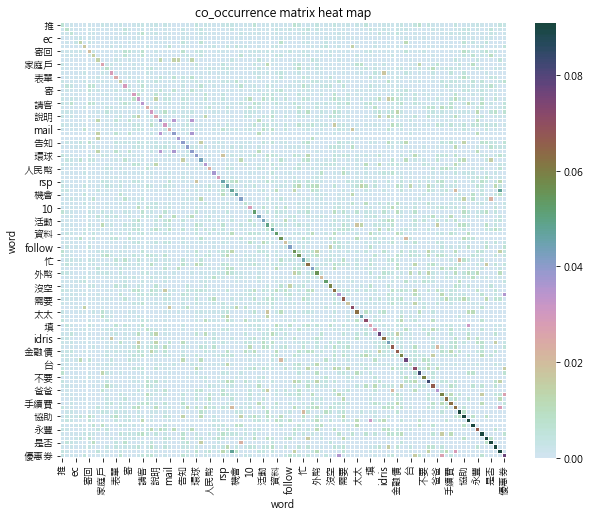

In [220]:
import copy
# c_matrix_copy = copy.deepcopy(c_matrix)
#c_matrix_copy = pd.to_numeric(c_matrix_copy)


for i in range(len(c_matrix.index)):
    for j in range(len(c_matrix.columns)):
        #print(c_matrix_copy.iloc[i][j], c_matrix_copy.iloc[i][i], c_matrix_copy.iloc[j][j])
        c_matrix.iloc[i][j] = float(c_matrix_copy.iloc[i][j]) / (c_matrix_copy.iloc[i][i] * c_matrix_copy.iloc[j][j])

# print(c_matrix["中債"]/(c_matrix.loc["中債"]["中債"]))
chinese = pd.DataFrame({'Unique ID': c_matrix["中債"]})
chinese.to_csv('text_4.csv',encoding='utf_8_sig')

f, ax = plt.subplots(figsize = (10, 8))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(c_matrix, cmap = cmap, linewidths = 0.05, ax = ax)
ax.set_title('co_occurrence matrix heat map')
ax.set_xlabel('word')
ax.set_ylabel('word')
plt.show()

使用networkx畫出共線圖

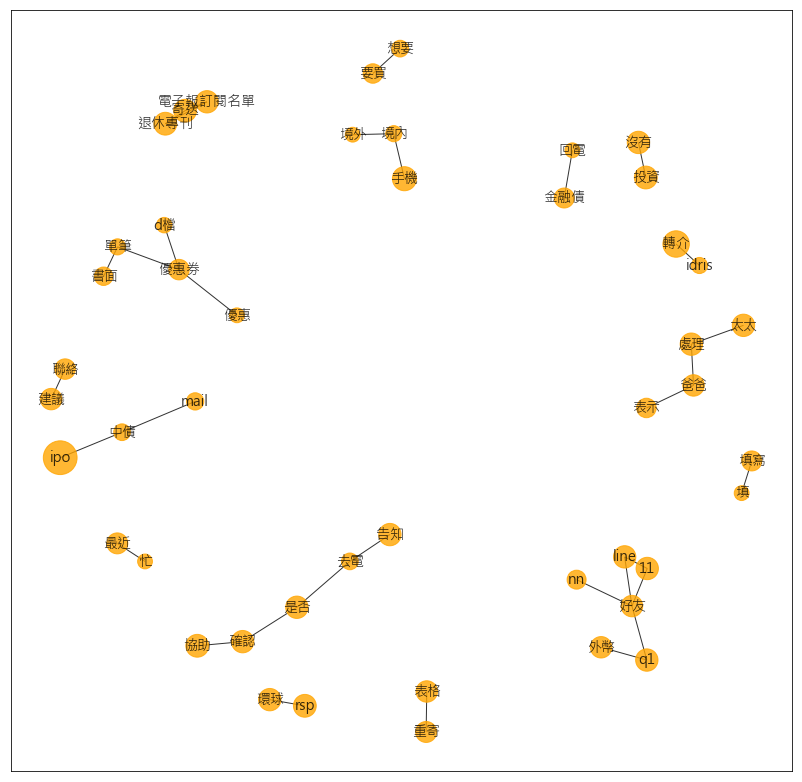

In [221]:
import networkx as nx

# Add weight to edges
edge_list = []
for i in range(len(c_matrix.index)):
    for j in range(len(c_matrix.columns)):
        edge_list.append((c_matrix.index[i],c_matrix.columns[j],c_matrix.iloc[i,j]))


update_list = []
for i in edge_list:
    update_list.append(i)

for i in update_list:
	if i[0] == i[1]:
		edge_list.remove(i)
	elif i[2] < 0.015:
		edge_list.remove(i)


for i in node_list:
    tmp = 0
    for j in edge_list:
        if i[0] == j[0]:
            tmp = 1
    if tmp == 0:
        node_list.remove(i)

node_list = []
for i in edge_list:
	node_list.append((i[0], dfWord.loc[i[0], "count"]))
	node_list.append((i[1], dfWord.loc[i[1], "count"]))

plt.subplots(figsize=(14,14))
# Networkx graph
G = nx.Graph()
for i in node_list:
	G.add_node(i[0], size = i[1])

for i in edge_list:
	G.add_edge(i[0], i[1], size = i[2])
    
pos = nx.spring_layout(G, k=0.3)
node_scalar = 20
edge_scalar = 10
sizes = [x[1]*node_scalar for x in node_list]
widths = [x[2]*edge_scalar for x in edge_list]

nx.draw_networkx(G, pos, with_labels =True, font_size = 14, node_size = sizes, edge_size = widths, node_color = "orange", alpha = 0.8)


In [ ]:
keywords = ["中債", "中國", "ipo", "rsp", "環球"]


In [128]:
"""
#---------MONTH-------------------------------------------------
month_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
output = remember
no_drop = [0] + month_days[0:-1]
no_drop_list = []
for i in range(12):
	no_drop_list.append(sum(no_drop[0:i+1]))
#print(no_drop_list)
drop_list = list(range(0, 365))
drop_list = [x for x in drop_list if x not in no_drop_list]
#print(drop_list)

#drop_date = []
#for i in range(len(drop_list)):
drop_date = list(output.columns[drop_list])
#print(drop_date)




for i in range(len(output.index)):
	for j in range(12):
		tmp = ""
		for k in range(month_days[j]):
			if pd.isnull(output.loc[output.index[i], output.columns[sum(month_days[0:j]) + k]]):
				continue
			tmp += (str(output.loc[output.index[i], output.columns[sum(month_days[0:j]) + k]]) + "\n")
			output.loc[output.index[i], output.columns[sum(month_days[0:j])]] = tmp



	
output = output.drop(drop_date, axis=1)
output.to_csv('month.csv',encoding='utf_8_sig')
'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-128-13f1797438a7>, line 36)

In [ ]:
"""
#---------Quarter-------------------------------------------------
for i in range(len(output.index)):
	for j in range(0, 12, 3):
		tmp = ""
		for k in range(3):
			if pd.isnull(output.loc[output.index[i], output.columns[j + k]]):
				continue
			tmp += (str(output.loc[output.index[i], output.columns[j + k]]) + "\n")
			output.loc[output.index[i], output.columns[j]] = tmp


quarter_drop = []
for i in range(12):
	if i%3 == 0:
		continue
	quarter_drop.append(output.columns[i])
#print(quarter_drop)


output = output.drop(quarter_drop, axis=1)

output.to_csv('quarter.csv',encoding='utf_8_sig')
"""